In [249]:
import qutip as qutip
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [137]:
%matplotlib notebook

In [2]:
# First things first: make a gaussian wavefunction moving with constant velocity and simulate evolution

In [291]:
# Using qutip
N = 60
m = 1
omega = 2 * np.pi * 1

coherent = qutip.coherent(N, 1.0)
xhat = qutip.position(N)
phat = qutip.momentum(N)
xhat_bar = qutip.expect(xhat, coherent)
delta_xhat_squared = (xhat - xhat_bar)**2

In [278]:
qutip.expect(xhat, coherent)
np.sqrt(qutip.expect((xhat - qutip.expect(xhat, coherent))**2, coherent))

0.7071067811865476

In [279]:
H = phat * phat + xhat * xhat

In [280]:
times = np.linspace(0, 10, 10000)

In [281]:
results = qutip.mesolve(H, coherent, times, e_ops=[xhat, phat])

<IPython.core.display.Javascript object>


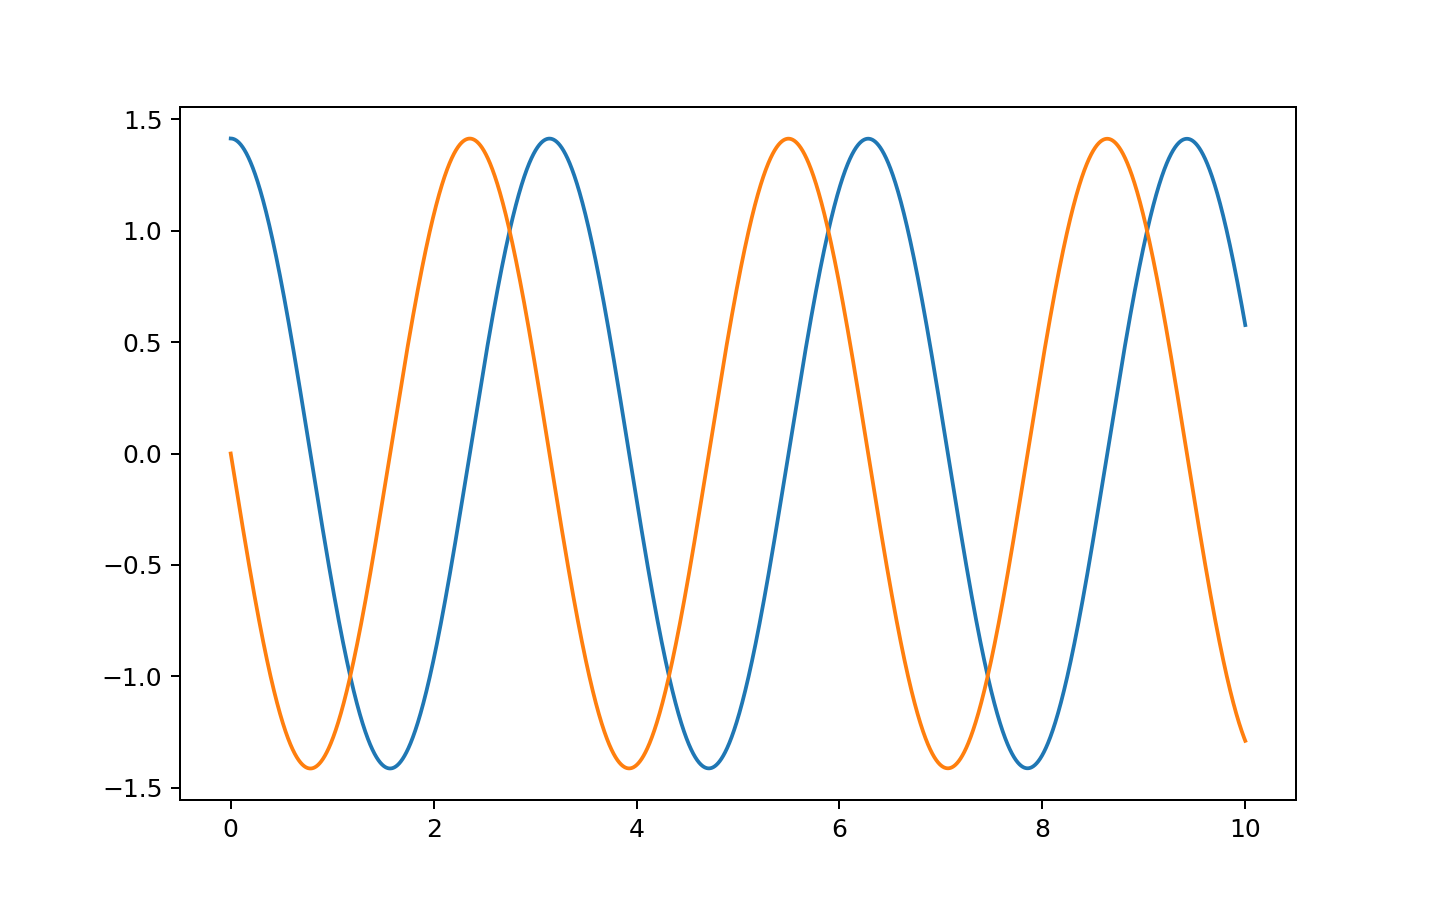

In [282]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.plot(times, results.expect[0])
ax.plot(times, results.expect[1])

In [273]:
# Hermite polynomials

In [283]:
def recur_normalized_hermite(n, Hn_min_1, Hn_min_2, ys):
    return (1/(4*n**2))**(1/4) * 2 * ys * Hn_min_1 - (1/(16*(n*(n-1))**2))**(1/4) * 2 * (n - 1) * Hn_min_2

def generate_normalized_hermite_polynomials(N, ys):
    # Generates the first n 'normalized' Hermite polynomials. They aren't themselves normalized,
    # but instead include the proper prepended normalization constant the wavefunctions they
    # will weight will need.
    H0 = np.ones(len(ys))
    H1 = (1/4)**(1/4) * 2 * np.copy(ys)
    Hs = [H0, H1]
    for n in range(2, N + 1):
        Hs.append(recur_normalized_hermite(n, Hs[n-1], Hs[n-2], ys))
    return Hs

def gaussian_modulation(ys):
    return np.exp(-ys * ys / 2) / (np.pi)**(1/4)

def construct_x_wave_function(state, N, ys):
    Hs = generate_normalized_hermite_polynomials(N, ys)
    gaussian_envelope = gaussian_modulation(ys)
    psi_ns = [Hn * gaussian_envelope for Hn in Hs]
    
    fock_states = [qutip.basis(N, n) for n in range(N)]
    
    wave_function = np.zeros(ys.shape, dtype=complex)
    for n, fock_state in enumerate(fock_states):
        wave_function += ((fock_state.dag()) * state)[0][0][0] * psi_ns[n]
    return wave_function

def integrate(f, ys):
    dy = ys[1] - ys[0]
    return dy * sum(f)

<IPython.core.display.Javascript object>


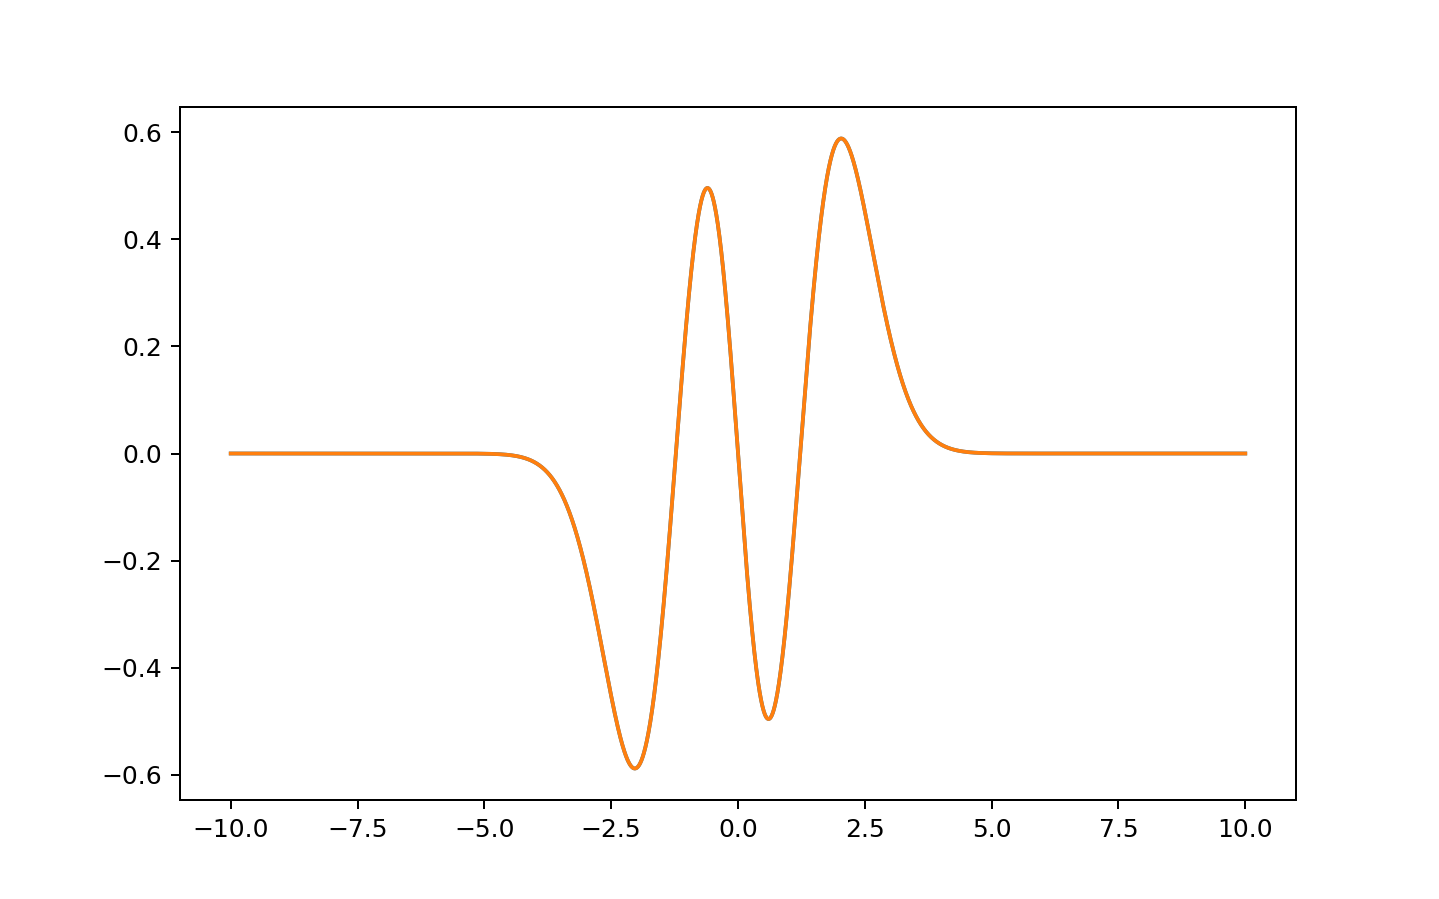

0.999999999999614
0.9999999999996136
0.9999999999996113
0.9999999999996134
0.999999999999613
0.9999999999996129
0.9999999999996114
0.9999999999996119
0.9999999999996113
0.9999999999996122
0.999999999999615
0.9999999999996148
0.9999999999996133
0.9999999999996119
0.9999999999996165
0.9999999999996165
0.9999999999996159
0.9999999999996138
0.9999999999996159
0.9999999999996131
0.9999999999996154
0.9999999999996143
0.9999999999996139
0.9999999999996121
0.9999999999996099
0.9999999999995969
0.9999999999995054
0.9999999999989985
0.9999999999964202
0.9999999999839658
0.9999999999267927
0.9999999996773442
0.9999999986427369
0.99999999456187
0.9999999792506854
0.9999999245996883
0.9999997390220567
0.9999991395831721
0.9999972981550213
0.9999919204737313
0.999976998006424
0.9999376797974399
0.9998393978427625
0.9996065864275234
0.9990846769497738
0.9979792762191759
0.995771867366094
0.9916263672005493
0.9843280844056022
0.9723312191512555
0.9540135467681711
0.928211024093885
0.8949911306605527
0

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [287]:
ys = np.linspace(-10, 10, 10000)
Hs = generate_normalized_hermite_polynomials(N, ys)
gaussian_envelope = gaussian_modulation(ys)
fig, ax = plt.subplots(1, figsize=(8, 5))
psi_ns = [Hn * gaussian_envelope for Hn in Hs]
ax.plot(ys, psi_ns[3])
wave_function = construct_x_wave_function(qutip.basis(N, 3), N, ys)
ax.plot(ys, wave_function)
for psi_n in psi_ns:
    print(integrate(np.abs(psi_n)**2, ys))

In [297]:
H = phat * phat 
psi0 = (-1j* 10 * xhat).expm() * qutip.basis(N, 0)
times = np.linspace(0, 10, 1000)
results = qutip.mesolve(H, psi0, times)
print(len(results.states))

1000


In [293]:
time_slices = []
for state in results.states:
    time_slices.append(construct_x_wave_function(state, N, ys))

<IPython.core.display.Javascript object>


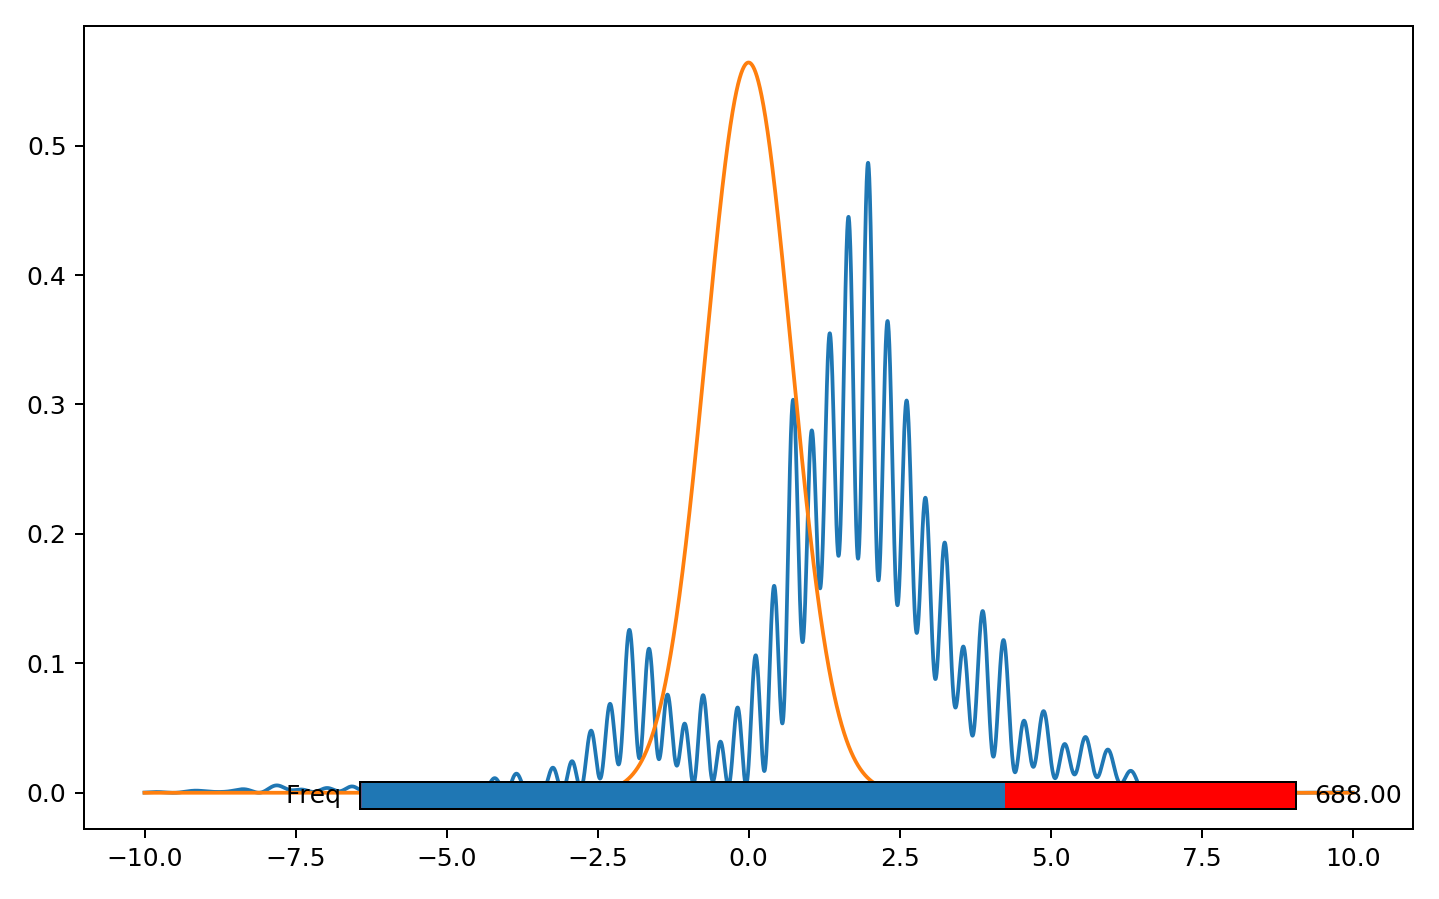

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


In [299]:
fig, ax = plt.subplots(1, figsize=(8, 5))
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='red')
sfreq = Slider(axfreq, 'Freq', 0, 999, valinit=0, valstep=1)
l, = ax.plot(ys, np.abs(time_slices[0])**2)

def update(val):
    print('hi')
    freq = sfreq.val
    l.set_ydata(np.abs(time_slices[int(freq)])**2)
    fig.canvas.draw_idle()
    ax.plot()
    
sfreq.on_changed(update)
ax.plot(ys, (np.abs(psi_ns[0]))**2)
fig.tight_layout()